In [49]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [50]:
# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')
flight_dframe.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [51]:
#Preview
flight_dframe.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [52]:
# Let's pivot this dataframe do its easier to manage
# flight_dframe = flight_dframe.pivot("month","year","passengers") -> pivot() takes 1 positional argument but 4 were given
flight_dframe = flight_dframe.pivot_table(index='month', columns='year', values='passengers')

#Show
flight_dframe

/var/folders/q6/kztts0vn7610dqsjfrs11s900000gn/T/ipykernel_62833/3139630121.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flight_dframe = flight_dframe.pivot_table(index='month', columns='year', values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

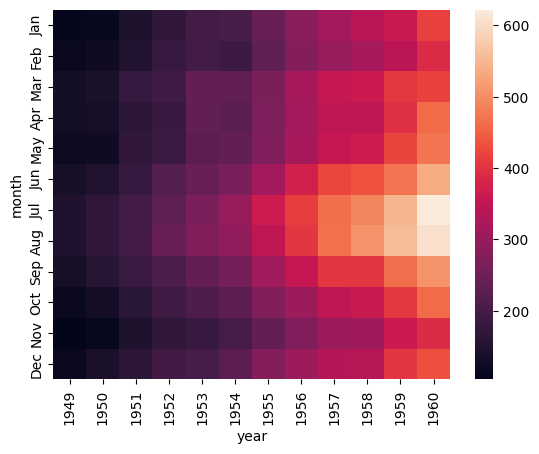

In [53]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe)

<Axes: xlabel='year', ylabel='month'>

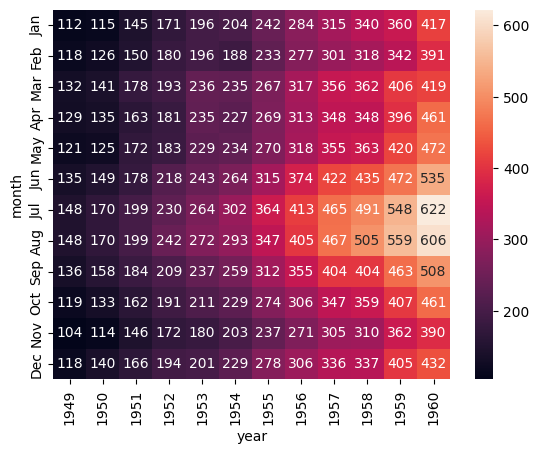

In [54]:
# We also have the option to annotate each cell
# sns.heatmap(flight_dframe,annot=True, fmt='d') -> deos not work
sns.heatmap(flight_dframe,annot=True, fmt='g')

In [55]:
# seaborn will automatically try to pick the best color scheme for your dataset, whether is be diverging or converging colormap

In [56]:
# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

KeyError: 'January'

<Axes: xlabel='year', ylabel='month'>

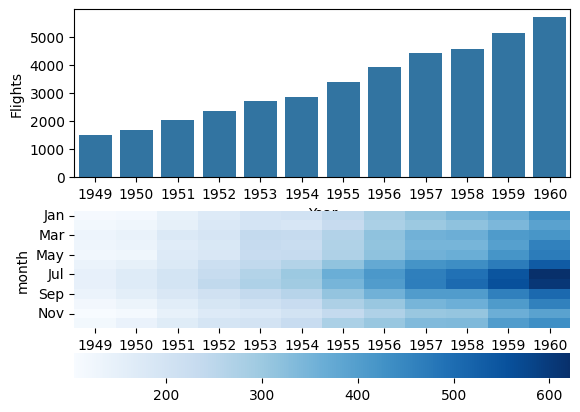

In [ ]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe WHY?????

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot(x='Year',y='Flights',data=year_dframe, ax = axis1)
# sns.barplot(data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

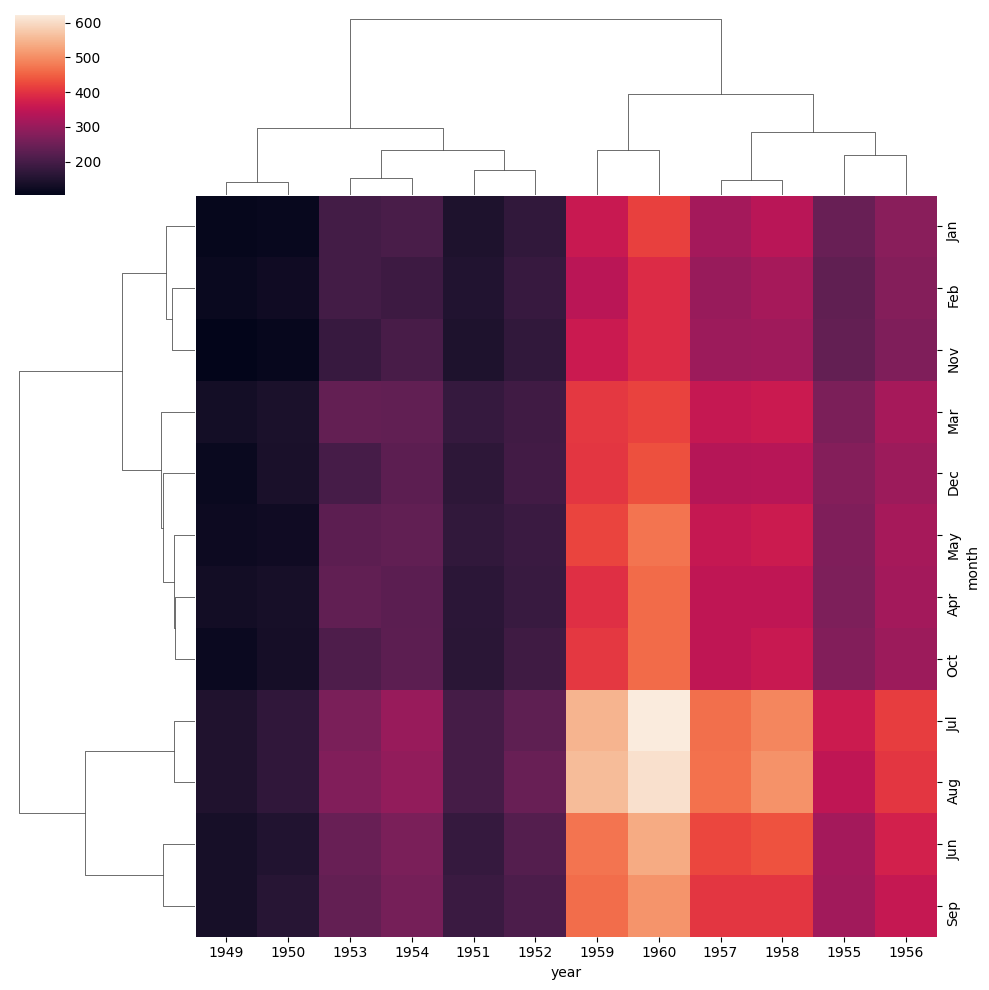

In [ ]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

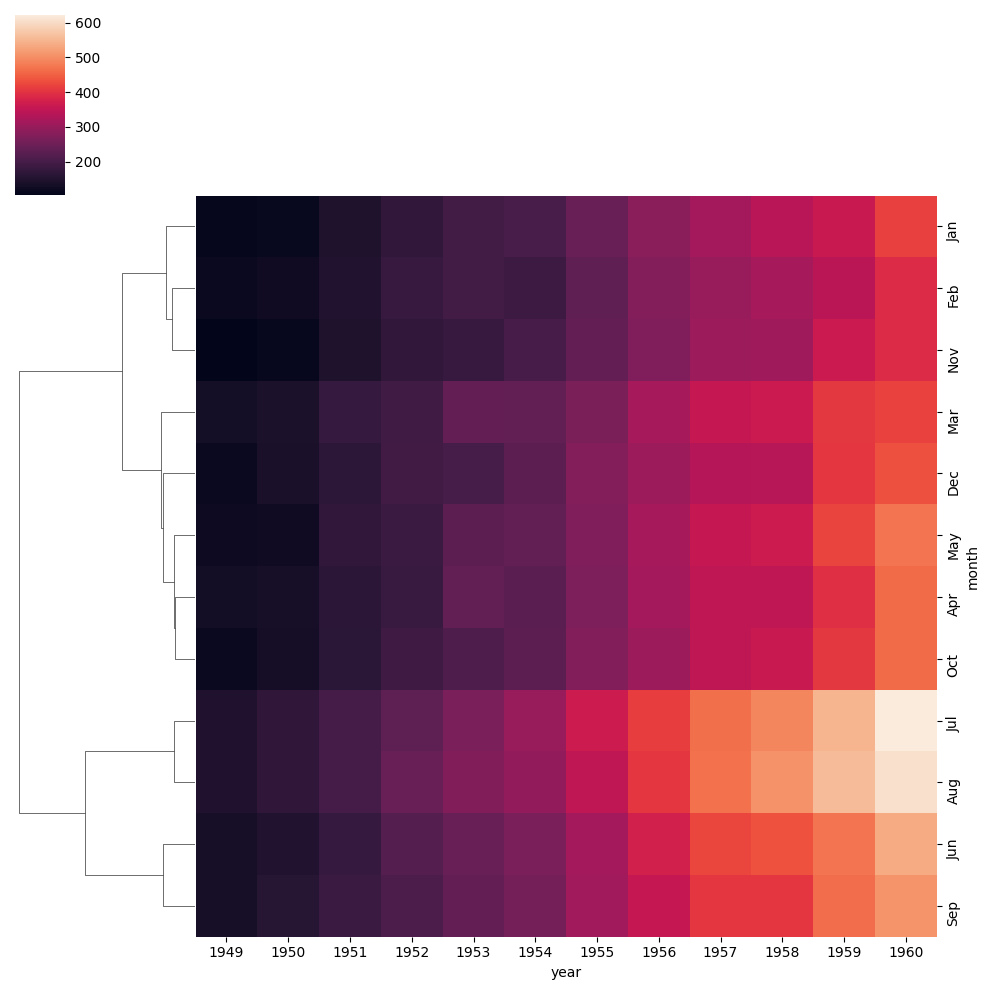

In [ ]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False)

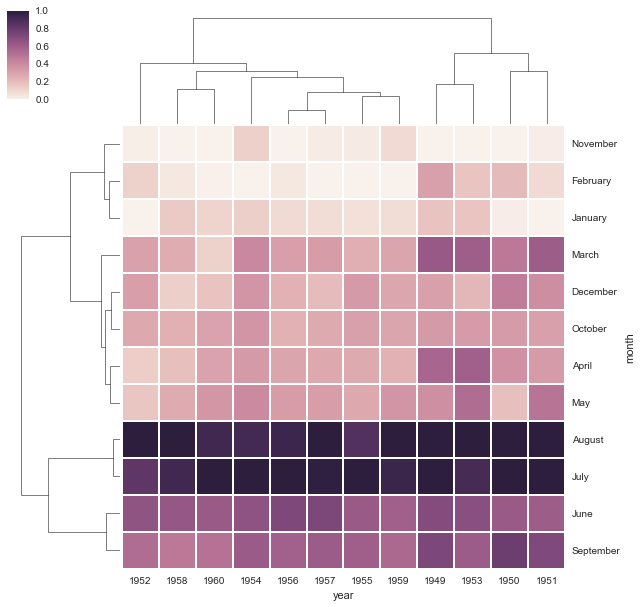

In [ ]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

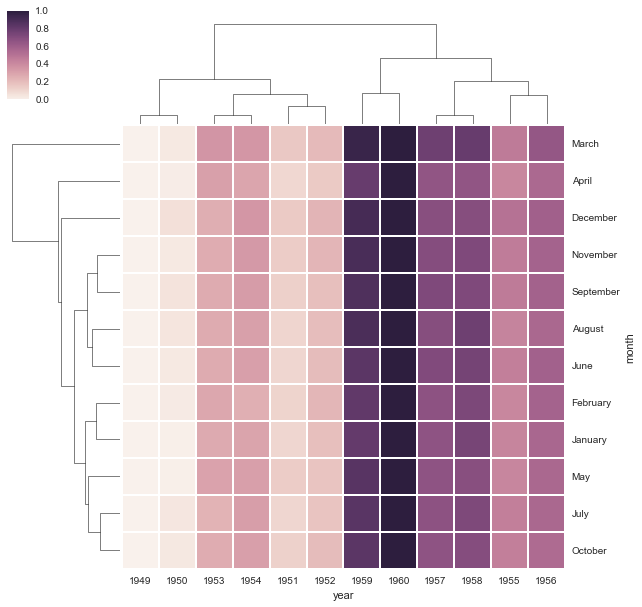

In [ ]:
# Or scale the rows
sns.clustermap(flight_dframe,standard_scale=0)

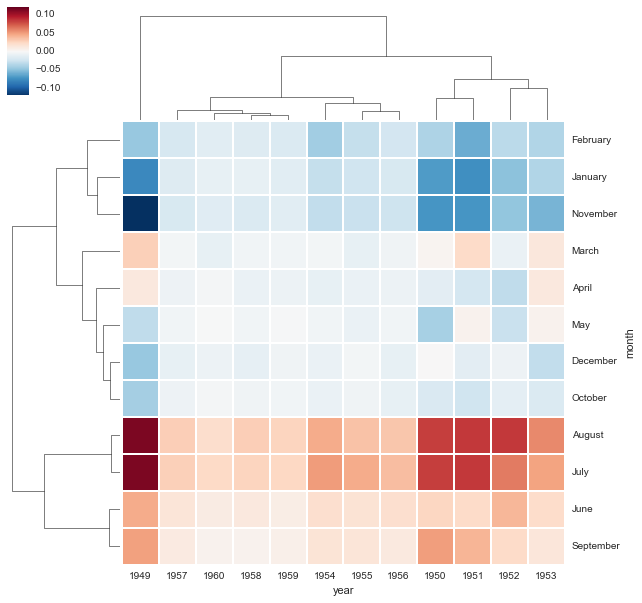

In [ ]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)

In [ ]:
# Above we can see which values are greater than the mean and which are below very clearly

In [ ]:
# CONGRATULATIONS!! We've developed quite a toolbox to hammer out some great data anaysis projects!

# Up next: Projects to apply what we've learned to real datasets!